# Breve Introduzione a NumPy

NumPy è la libreria di calcolo algebrico che implementa i vettori e matrici di tipo numerico e le operazioni su di essi. L'array n-dimensionale (```ndarray```) è strutturato come un oggetto di un certo tipo e un suo layout in memoria. Lo ```ndarray``` è caratterizzato dauna sua ```shape``` ovvero la tupla delle sue dimensioni.

In [1]:
import numpy as np

a = np.array([[1,2,3],[4,5,6]]) # opzionale dtype='int64' o 'float64'

b = np.array(a,dtype='float64')

print(a[0][2],b)

b.shape


3 [[1. 2. 3.]
 [4. 5. 6.]]


(2, 3)

In [2]:
b[0, 2]

3.0

In [11]:
c = b[:,1]

g = np.array([[3],[5]])

g.shape

print(c,c.shape)
print(g,g.shape)


[2. 5.] (2,)
[[3]
 [5]] (2, 1)


In [12]:
# creazione e copia di ndarray
z = np.zeros((2,3))
print(z,'\n\n')

e = np.eye(4,dtype='int32')
print(e,'\n\n')

fl = np.full_like(a,3.6) # il tipo è int
print(fl)

[[0. 0. 0.]
 [0. 0. 0.]] 


[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]] 


[[3 3 3]
 [3 3 3]]


In [3]:
# creazione di matrici
import numpy.matlib as npm

m = npm.mat([[1,2,3],[4,5,6]])

print(m,'\n\n')

mm = npm.asmatrix(a)

print(mm,'\n\n')

print(m+mm,'\n\n')

mm[0,2]

[[1 2 3]
 [4 5 6]] 


[[1 2 3]
 [4 5 6]] 


[[ 2  4  6]
 [ 8 10 12]] 




3

In [22]:

c = np.eye(4)
c.shape
c*b[a>2]


array([[3., 0., 0., 0.],
       [0., 4., 0., 0.],
       [0., 0., 5., 0.],
       [0., 0., 0., 6.]])

(4,) (4,4) --> (4,1) (4,4) 

In [8]:
print(a,a[1,2],a[:,1:], sep='\n') # gli array usano lo slicing di Pyhon: lavorare su una slice significa modificare l'array originale

print(a.shape) # tupla con le dimensioni

print(a[a%2==0]) # array contenente tutti gli elementi pari

print(a.T) # proprietà dell'array che non lo modifica

print(a.transpose()) # uso del metodo esplicito di trasposizione che non modifica l'array

print(a.reshape(3,2)) # reshaping: restituisce un array con gli elementi disposti secondo la tupla passata come argomento e **modifica** l'array


[[1 2 3]
 [4 5 6]]
6
[[2 3]
 [5 6]]
(2, 3)
[2 4 6]
[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]
[[1 2]
 [3 4]
 [5 6]]


In [26]:
a.reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [18]:
a[a>3]=8
a

array([[1, 2, 3],
       [8, 8, 8]])

In [21]:
print(a,b)

# operatori elemento per elemento
print(a+b)

print(a*b)

print(a<=3)


[[1 2 3]
 [4 5 6]] [[1. 2. 3.]
 [4. 5. 6.]]
[[ 2.  4.  6.]
 [ 8. 10. 12.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[ True  True  True]
 [False False False]]


In [10]:
# Generazione di range
x = np.arange(-1,1.1,0.1) # np.arange([start,]stop[,step],dtype=None)
                          # lo stop è escluso

print(x)

# formattazione di un ndarray per la stampa
np.set_printoptions(precision=3, suppress=True)

print(x)


[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00]
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


# Broadcasting

è la tecnica per calcolare operazioni su array di dimensione diversa, omogeneizzando implicitamete le dimensioni attraverso
duplicazione degli elementi nell'array di rango minore.

In questo modo si ottiene una implementazione che di fatto è un'operazione elemento per elemento

Regole:
1. si estendono le dimensioni dell'array di rango minore premettendo 1 fino ad arrivare a due tuple di shape uguali
2. si verifica la compatibilità: in ogni dimensione le due tuple hanno valori uguali o una delle due vale 1
3. si duplicano gli elementi delle dimensioni unitarie in un array tante volte quant'è il valore della dimensione omologa nell'altro array

Esempio: prodotto esterno di due array di dimensione N cioè shape (N,); uno dei due subisce il reshape a (N,1) e si ha:

(N,) * (N,1) ==> (1,N) * (N,1) perché aggiungo 1 alla shape del primo array

Il primo array viene duplicato lungo le righe fino ad N (dimensione del secondo) e il secondo lungo le colonne fino a N (dimensione del primo)

Il prodotto esterno è la matrice ottenuta come prodotto elemento per elemento dei due array

Nell'esempio seguente: 
```
                       [1,2,3] * [4,      [[1,2,3],    [[4,4,4],      [[4,8,12],
                                  5,  ==>  [1,2,3],  *  [5,5,5],  =    [5,10,15],
                                  6]       [1,2,3]]     [6,6,6]]       [6,12,18]]
```
'*' è il prodotto elemento per elemento. Il prodotto esterno consueto si avrebbe calcolando:
```
[1,    [4,5,6]
 2, * 
 3]
```
In questo caso si ottiene la trasposta della matrice precedente perché le tuple si allineano come:

(N,1) * (N,) ==> (N,1) * (1,N)

e quindi il primo vettore si duplica lungo le colonne e il secondo lungo le righe.


In [11]:
print(np.array([1,2,3])*np.array([4,5,6]).reshape(3,1)) # * è il consueto prodotto elemento per elemento

[[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]]


In [18]:
"""
Introduciamo un po' di operatori dell'algebra lineare
"""
x=np.array([1,2,3])
y=np.array([4,5,6])

m = np.array([[1,2,3],[7,10,9],[4,5,6]])
n = np.array([[2,4],[6,8],[10,12]])

# prodotto interno
print(np.dot(x,y),end='\n\n')
print(np.dot(m,n),end='\n\n')

# prodotto esterno
print(np.outer(x,y),end='\n\n')

# determinante
print(np.linalg.det(m),end='\n\n')

# traccia  di una matrice
print(np.trace(m),end='\n\n')



32

[[ 44  56]
 [164 216]
 [ 98 128]]

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]

-11.999999999999995

17



In [19]:
# risoluzione del sistema lineare M*y=x
print(np.linalg.solve(m,x),end='\n\n')



[ 1.25  -1.5    0.917]



In [15]:
# calcolo delle norme
print(np.linalg.norm(x),np.linalg.norm(m),np.linalg.norm(x,ord=1),end='\n\n')



3.7416573867739413 16.881943016134134 6.0



In [20]:
# Fattorizzazione di matrice tramite Singular Value Decomposition
print(np.linalg.svd(m))


(array([[-0.202, -0.726,  0.658],
       [-0.848,  0.465,  0.253],
       [-0.489, -0.507, -0.71 ]]), array([17.86 ,  1.327,  0.506]), array([[-0.453, -0.635, -0.626],
       [ 0.377,  0.499, -0.78 ],
       [-0.807,  0.59 , -0.013]]))


# Breve introduzione a Matplotlib

Disegnamo le funzioni:

- $y = x$
- $y = x^2$
- $y = x^3$

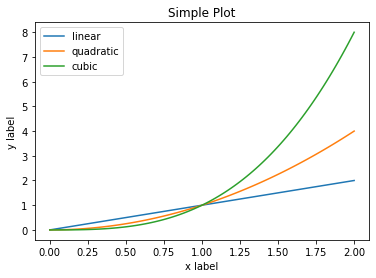

In [27]:
import math as m
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

Analizziamo il codice scritto:

```python
import math as m
import matplotlib.pyplot as plt
```

Per prima cosa importiamo `math` per avere le funzioni matematiche. La libreria `matplotlib` fornisce un'interessante API denominata `pyplot` che ci presenta un'interfaccia di `matplotlib` rappresentata come _macchina a stati_ per cui componiamo la figura che vogliamo _per parti_, un po' come in `MATLAB`. 

Come riferimento guardiamo la figura seguente:

![Struttura di un grafico con la API `pyplot`](https://matplotlib.org/3.1.1/_images/anatomy.png)
<p style="textalign: center"><span style="font-weight: bold">Figura 1:</span> Struttura di un grafico con la API <code>pyplot</code> (Fonte: <a href="https://matplotlib.org/3.1.1/index.html">matplotlib.org</a>)</p>

Come si vede chiaramente, la API `pyplot` ci consente di creare una _figure_ che è composta tra le altre cose dal grafico vero e proprio e da tutta una serie di oggetti che lo decorano.

Al fine di creare i nostri dati invochiamo `numpy` e richiediamo la generazione di un _linear space_:

```python
import numpy as np


x = np.linspace(0, 2, 100)
```

Il metodo `numpy.linspace(start,stop,num)` crea un array costituito da `num` elementi uniformemente distribuiti tra `start` e `stop`, estremi inclusi.

Il grafico vero e proprio viene generato con le chiamate seguenti:

```python
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
```

Si noti qui l'uso dell'operatore di elevazione a potenza `**` che è applicato all'array `x` direttamente elemento per elemento.

La chiamata a `matplotlib.pyplot.plot([x], y, [fmt], scalex=True, scaley=True, data=None, **kwargs)` disegna effettivamente un grafico con i soli assi e la curva ottenuta dal vettore `y` vs `x` che funge da ascissa. La stringa `fmt` è una combinazione di caratteri che indicano il formato della linea in termini di _<marcatore,tratto,colore>_. per esempio il valore '+r--' indica dei marcatori '+' di colore rosso e linea a tratti ('--'). I parametri di scala alla dimensione mostrata del canvas `scalex` e `scaley` sono veri di default mentre `data` fa riferimento a un oggetto Python indicizzabile, come ad esempio un `dict`, il quale può essere usato per ospitare la corrispondenza tra ascisse ed ordinate del grafico al posto di passare i due array separatamente. Infine `kwargs` sono una lista di coppie chiave-valore, definite nella classe _`matplotlib.lines.Line2D`_, che compongono lo stile della linea. Un esempio sono le specifiche `label` nel codice.

Le linee seguenti:
```python
plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()
```
aggiungono rspettivamente la didascalia degli assi _x_ ed _y_, il titolo della figura e la legenda: i colori ed il tratto delle linee sono quelli di default mentre il testo della legenda è ottenuto dal parametro `label` passato alle chiamate `plot()`. Infine il metodo `show()` mostra effettivamente l'intera figura.

## Subplot

Matplotlib consente di creare visualizzazioni multi figura per attraverso la creazione di _subplot_ con un determinato layout all'interno di una `figure`.

```python
fig, axs =  matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False,\
 squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
````

`fig` è il riferimento alla figura creata, `axs` è l'_asse_ (ovvero il singolo grafico) o la lista di assi creati secondo un layout a griglia specificato da `nrows` e `ncols`. `sharex` e `sharey` definiscono se i grafici devono o meno condividere gli assi x e y rispettivamemte.

`squeeze` definisce se l'array di assi deve eventualmente essere monodimensionale (se `nrows` o `ncols` è pari a 1) ovvero essere una semplice istanza ad un oggetto di classe `Axes`. `squeeze = False` impone che il risultato sia sempre un array bidimensionale.

`subplot_kw` argomenti parole chiave passati alle singole chiamate `add_subplot()` di creazione del singolo plot.

`gridspec_kw` argomenti parole chiave passati al costruttore `GridSpec` invocato per creare il layout a griglia.

`fig_kw` argomenti parole chiave passati alla chiamata del costruttore `Figure` di creazione dell'intera figura.




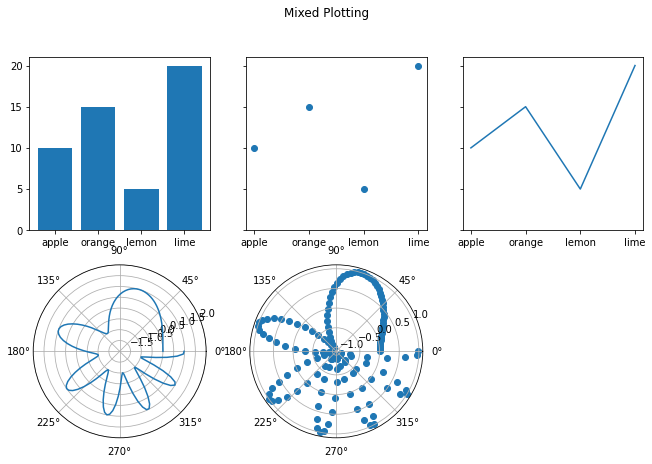

In [32]:
# Creiamo un po' di dati
x = np.linspace(0, 2*np.pi, 150)
y = np.sin(x**2)

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(2, 3, figsize=(11, 7), sharey=True)
axs[0, 0].bar(names, values)
axs[0, 1].scatter(names, values)
axs[0, 2].plot(names, values)

# cancelliamo i bordi e i tick del subplot corrente e ne creiamo un altro polare
axs[1, 0].set_frame_on(False)
axs[1, 0].tick_params(axis='both',\
                    which='both',\
                    bottom=False,top=False,right=False,left=False,\
                    labelbottom=False,labelleft=False)

axs[1, 0] = fig.add_subplot(234,projection='polar')

axs[1, 0].set_ylim(bottom=-2.0,top=2.0)
axs[1, 0].plot(x,y)


# idem per il successivo
axs[1, 1].set_frame_on(False)
axs[1, 1].tick_params(axis='both',\
                    which='both',\
                    bottom=False,top=False,right=False,left=False,\
                    labelbottom=False,labelleft=False)
axs[1, 1] = fig.add_subplot(235,projection='polar')
axs[1, 1].scatter(x, y)

# Non mostriamo l'ultimo grafico che altrimenti sarebbe vuoto, ma con gli assi visibili
axs[1, 2].set_frame_on(False)
axs[1, 2].tick_params(axis='both',\
                    which='both',\
                    bottom=False,top=False,right=False,left=False,\
                    labelbottom=False,labelleft=False)

fig.suptitle('Mixed Plotting')

# mostriamo tutto il grafico
plt.show()


# Esercizi

1. Generare una sequenza di 20 valori tratti uniformememnte dalla funzione $e^{-sin(x)}$ nell'intervallo $[0,\pi]$ e disegnarli utilizzando un marcatore a forma di diamante, di colore marrone e senza linea di raccordo. Si aggiungano il titolo, le didascalie, le legende e si impostino i _minor ticks_ a passi di $0.1$ con le relative legende.
2. Generare un istogramma a partire da un insieme di dati etichettati contenuti in un dict: `fruits={'apple': 23, 'banana': 48, 'mango': 65, 'lemon': 12}` utilizzando il metodo `hist()`. Si lascia libertà di scelta sul colore delle barre e sul testo del titolo e delle didascalie.
    1. _Parte Opzionale_: si crei un istogramma bidimensionale e/o con barre multivalore a partire dalla seguente struttura dati: \
    `fruit_sells = {'apple': {'Q1': 12, 'Q2': 24, 'Q3': 31, 'Q4': 17}, 'banana': {'Q1': 21, 'Q2': 30, 'Q3': 18, 'Q4': 53}, 'mango': {'Q1': 18, 'Q2': 9, 'Q3': 33, 'Q4': 65}, 'lemon': {'Q1': 30, 'Q2': 8, 'Q3': 17, 'Q4': 23}}`